In [328]:
import pandas as pd
import json
import emoji
import matplotlib.pyplot as plt

In [329]:
#"session_restructured.js"

with open('nonVar_session_restructured.js', 'r') as f:
    sessionData = json.load(f)

In [330]:
starHintLabels = pd.read_csv("starHintLifecycleLabels.csv", header = None).drop(0, axis = 0).drop(0, axis = 1)

In [331]:
keys = starHintLabels[1].apply(lambda x: emoji.emojize(x, language='alias'))
labels = starHintLabels[2]

In [332]:
labelDict = dict(zip(keys, labels))

In [333]:
sessionMessages = sessionData[0]['messages']

In [334]:
flagList = []
for message in sessionMessages:
    messageText = message['message']
    if messageText in labelDict.keys():
        message['lifecycleStage'] = labelDict[messageText]
    else: message['lifecycleStage'] = "None"

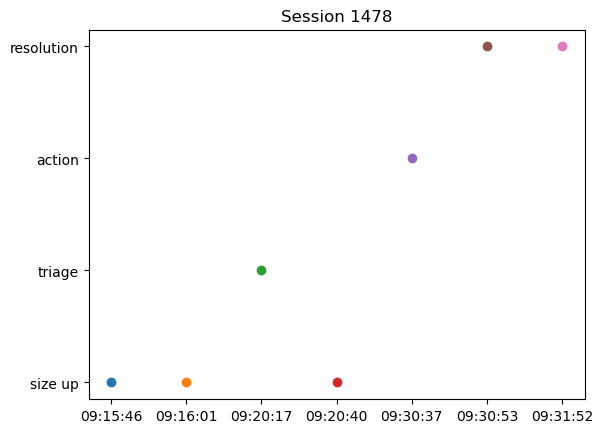

In [360]:
for message in sessionMessages:
    if message["lifecycleStage"] != "None":
        plt.scatter(y = message['lifecycleStage'], x = message["datetime"][-8:])

plt.title("Session "  + str(sessionData[0]['session_id']))
plt.show()

'09:32:48'